# 07/31 : 시리즈, 데이터프레임, 시각화 초반

### 판다스 dataframe & series

In [1]:
import pandas as pd

In [2]:
# 시리즈 생성
df = pd.Series(['yk','hi',3])

In [3]:
df

0    yk
1    hi
2     3
dtype: object

In [4]:
# 인덱스로 값 설정
df = pd.Series(['yk','hi',3],index=['name','a','b'])

In [5]:
df

name    yk
a       hi
b        3
dtype: object

In [6]:
# df 생성
df_st = pd.DataFrame({'name':['yk','hi'],
                     'b':['c','a'],
                     'age':[11,12],
                     'd':['dd','dddd']})

In [7]:
df_st

,name,b,age,d
0,yk,c,11,dd
1,hi,a,12,dddd


In [8]:
df_st_1 = pd.DataFrame({'name':['yk','hi'],
                     'b':['a','c'],
                     'age':[11,12],
                     'd':['dd','dddd']})

In [9]:
df_st_1

,name,b,age,d
0,yk,a,11,dd
1,hi,c,12,dddd


In [10]:
print(df_st)
print(df_st_1)

  name  b  age     d
0   yk  c   11    dd
1   hi  a   12  dddd
  name  b  age     d
0   yk  a   11    dd
1   hi  c   12  dddd


In [11]:
# df에서 시리즈 선택 방법
df_st_1['name']

0    yk
1    hi
Name: name, dtype: object

In [12]:
df_st_1.loc[:,'name']

0    yk
1    hi
Name: name, dtype: object

## df에서 하나의 열 추출해 시리즈 형태로 반환되었을 때 사용 가능한 메서드
- 시리즈에 사용하는 메서드(1.index 2.values 3.keys)
- append 2개 이상의 시리즈 연결
- describe 요약 통계
- drop_duplicates 중복 값이 없는 시리즈 반환
- equals 시리즈에 해당 값이 있는지 확인
- get_values 시리즈 값 구하기( =values )
- isin 시리즈에 포함된 값이 있는지 
- min, max, mean, median
- replace 특정 값을 가진 시리즈 값 교체
- sample 임의의 값 반환
- sort_values 정렬
- to_frame 시리즈 -> df로 반환

In [13]:
df_st_1

,name,b,age,d
0,yk,a,11,dd
1,hi,c,12,dddd


In [14]:
df_st_1.index # index

RangeIndex(start=0, stop=2, step=1)

In [15]:
df_st_1.values # 속성 값

array([['yk', 'a', 11, 'dd'],
       ['hi', 'c', 12, 'dddd']], dtype=object)

In [16]:
df_st_1.keys() # 컬럼의 개념

Index(['name', 'b', 'age', 'd'], dtype='object')

In [17]:
df_st_1.keys()[3]

'd'

In [18]:
# 시리즈 값 자체로 mean, min, max, std 메서드 사용 가능

In [19]:
ages = df_st_1['age']

In [20]:
ages.min()

11

In [21]:
ages.describe()

count     2.000000
mean     11.500000
std       0.707107
min      11.000000
25%      11.250000
50%      11.500000
75%      11.750000
max      12.000000
Name: age, dtype: float64

In [22]:
ages.sort_values()

0    11
1    12
Name: age, dtype: int64

In [23]:
# 시리즈에서 비교

In [24]:
mpg = pd.read_csv('../mpg.csv')

In [25]:
ctys=mpg['cty']

In [26]:
ctys[ctys>ctys.mean()] # 비교

0      18
1      21
2      20
3      21
5      18
       ..
228    18
229    19
230    21
232    18
233    17
Name: cty, Length: 118, dtype: int64

In [27]:
# broadcasting : 한번에 연결

In [28]:
print(ctys+ctys)  # 시리즈끼리 연산

0      36
1      42
2      40
3      42
4      32
       ..
229    38
230    42
231    32
232    36
233    34
Name: cty, Length: 234, dtype: int64


In [29]:
print(ctys+100) # 값에 대해

0      118
1      121
2      120
3      121
4      116
      ... 
229    119
230    121
231    116
232    118
233    117
Name: cty, Length: 234, dtype: int64


In [30]:
mpg['cty']+100

0      118
1      121
2      120
3      121
4      116
      ... 
229    119
230    121
231    116
232    118
233    117
Name: cty, Length: 234, dtype: int64

In [31]:
# df 다루기

In [32]:
mpg[mpg['cty']>mpg['cty'].mean()]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
228,volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [33]:
mpg*2

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audiaudi,a4a4,3.6,3998,8,auto(l5)auto(l5),ff,36,58,pp,compactcompact
1,audiaudi,a4a4,3.6,3998,8,manual(m5)manual(m5),ff,42,58,pp,compactcompact
2,audiaudi,a4a4,4.0,4016,8,manual(m6)manual(m6),ff,40,62,pp,compactcompact
3,audiaudi,a4a4,4.0,4016,8,auto(av)auto(av),ff,42,60,pp,compactcompact
4,audiaudi,a4a4,5.6,3998,12,auto(l5)auto(l5),ff,32,52,pp,compactcompact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagenvolkswagen,passatpassat,4.0,4016,8,auto(s6)auto(s6),ff,38,56,pp,midsizemidsize
230,volkswagenvolkswagen,passatpassat,4.0,4016,8,manual(m6)manual(m6),ff,42,58,pp,midsizemidsize
231,volkswagenvolkswagen,passatpassat,5.6,3998,12,auto(l5)auto(l5),ff,32,52,pp,midsizemidsize
232,volkswagenvolkswagen,passatpassat,5.6,3998,12,manual(m5)manual(m5),ff,36,52,pp,midsizemidsize


In [34]:
print(mpg['model'].dtype)

object


In [35]:
# 새로운 파생 변수 만들기
mpg['new']=mpg['cty']-mpg['hwy']

In [36]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,new
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,-11
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,-8
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,-11
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,-9
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,-10
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,-9
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,-8
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,-10
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,-8


In [37]:
mpg.columns # 컬럼 뽑기

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'category', 'new'],
      dtype='object')

## 데이터 시각화

In [38]:
import seaborn as sns # 시각화에 필요한 모듈

In [39]:
df = sns.load_dataset('anscombe') # seaborn에서 제공하는 data

In [40]:
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [42]:
# matplotlib 라이브러리 모듈
%matplotlib notebook
import matplotlib.pyplot as plt

### 시각화는 보여주고 싶은 값을 추출하고 진행해야 함

In [44]:
df_1 = df[df['dataset']=='I']

In [45]:
df_1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


<IPython.core.display.Javascript object>


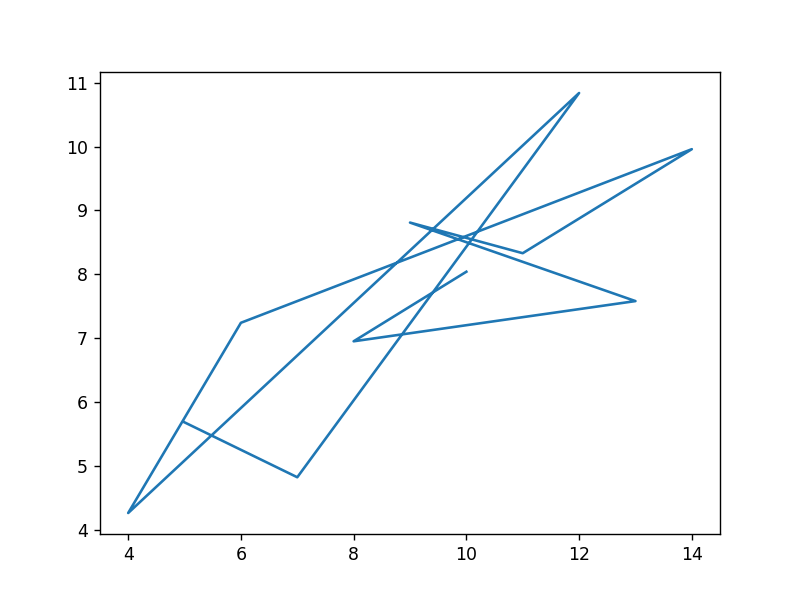

In [46]:
plt.plot(df_1['x'],df_1['y'])

<IPython.core.display.Javascript object>


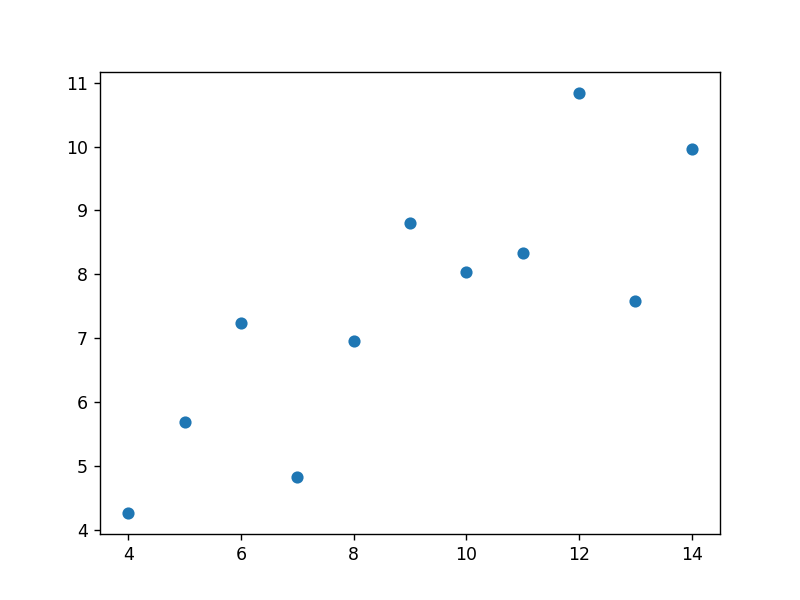

In [50]:
plt.plot(df_1['x'],df_1['y'],'o') # 점으로

In [51]:
df.dataset.value_counts()

I      11
II     11
III    11
IV     11
Name: dataset, dtype: int64

In [52]:
df_2 = df[df['dataset']=='II']
df_3 = df[df['dataset']=='III']
df_4 = df[df['dataset']=='IV']

In [53]:
df_4

,dataset,x,y
33,IV,8.0,6.58
34,IV,8.0,5.76
35,IV,8.0,7.71
36,IV,8.0,8.84
37,IV,8.0,8.47
38,IV,8.0,7.04
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91


<IPython.core.display.Javascript object>


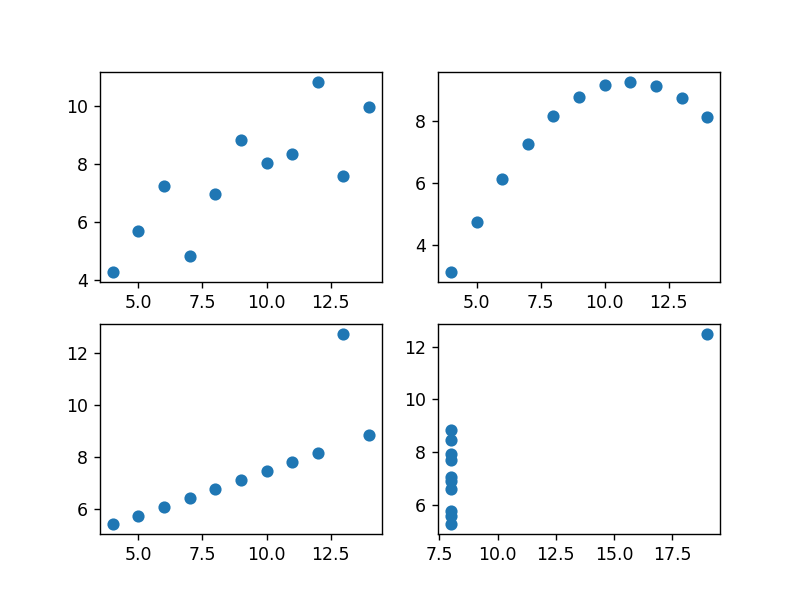

In [57]:
# 4개의 값을 시각화 처리하는 경우
# 그래프 그리기 위한 격자 기본틀 만들기
fig = plt.figure()
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)


axes1.plot(df_1['x'],df_1['y'],'o')
axes2.plot(df_2['x'],df_2['y'],'o')
axes3.plot(df_3['x'],df_3['y'],'o')
axes4.plot(df_4['x'],df_4['y'],'o')

## matplotlib 기초 그래프

In [58]:
tips = sns.load_dataset('tips')

In [59]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<IPython.core.display.Javascript object>


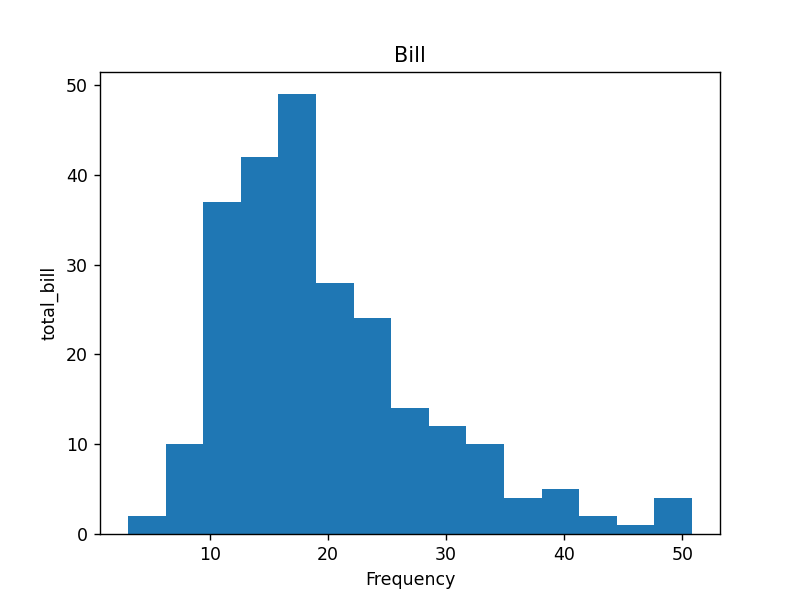

Text(0, 0.5, 'total_bill')

In [60]:
fig = plt.figure()

axes1 = fig.add_subplot(1,1,1)
axes1.hist(tips['total_bill'], bins=15) # bins 막대 개수
axes1.set_title('Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('total_bill')

#### 시각화를 할 때 어떤 변수를 사용해서 어떤 그래프를 그릴지 생각